In [13]:
import numpy as np

y_true = np.load("y_true_model_all.npy")  # Loads the true labels

y_scores1 = np.load("y_scores_model1.npy") # Probabilities from BiLSTM + GloVe
y_scores2 = np.load("y_scores_model2.npy") # BiLSTM + Random


In [2]:
import numpy as np

# Load the arrays
y_true = np.load("y_true_model_all.npy")
y_scores1 = np.load("y_scores_model1.npy")


# Check lengths
print("Lengths:")
print("y_true      :", len(y_true))
print("y_scores1   :", len(y_scores1))

# Check first few values to ensure the arrays are aligned
print("\nSample values:")
print("y_true[:5]     :", y_true[:5])
print("y_scores1[:5]  :", y_scores1[:5])

# Check for any NaNs
print("\nNaN Check:")
print("Any NaNs in y_true     :", np.isnan(y_true).any())
print("Any NaNs in y_scores1  :", np.isnan(y_scores1).any())


Lengths:
y_true      : 4226
y_scores1   : 4226

Sample values:
y_true[:5]     : [1. 1. 1. 1. 0.]
y_scores1[:5]  : [0.00230816 0.99968183 0.9820601  0.59403753 0.9950001 ]

NaN Check:
Any NaNs in y_true     : False
Any NaNs in y_scores1  : False


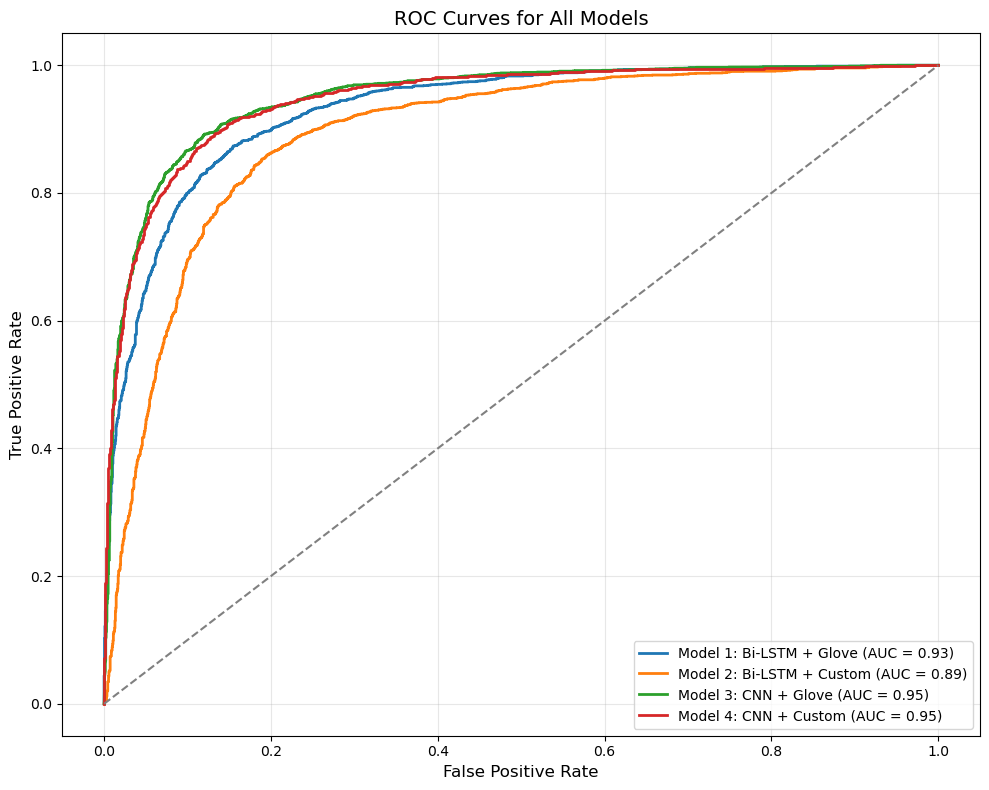

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load saved predictions and labels
y_true1 = np.load("y_true_model1.npy")
y_scores1 = np.load("y_scores_model1.npy")

y_true2 = np.load("y_true_model2.npy")
y_scores2 = np.load("y_scores_model2.npy")

y_true3 = np.load("y_true_model3.npy")
y_scores3 = np.load("y_scores_model3.npy")

y_true4 = np.load("y_true_model4.npy")
y_scores4 = np.load("y_scores_model4.npy")


# Calculate ROC and AUC for each model
fpr1, tpr1, _ = roc_curve(y_true1, y_scores1)
fpr2, tpr2, _ = roc_curve(y_true2, y_scores2)
fpr3, tpr3, _ = roc_curve(y_true3, y_scores3)
fpr4, tpr4, _ = roc_curve(y_true4, y_scores4)


auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)


# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f"Model 1: Bi-LSTM + Glove (AUC = {auc1:.2f})", lw=2)
plt.plot(fpr2, tpr2, label=f"Model 2: Bi-LSTM + Custom (AUC = {auc2:.2f})", lw=2)
plt.plot(fpr3, tpr3, label=f"Model 3: CNN + Glove (AUC = {auc3:.2f})", lw=2)
plt.plot(fpr4, tpr4, label=f"Model 4: CNN + Custom (AUC = {auc4:.2f})", lw=2)


# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Formatting
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves for All Models", fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
